In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
stays=pd.read_csv("/content/drive/MyDrive/Homestays_Data.csv")
stays

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [5]:
stays.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
stays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
stays.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [ ]:
stays.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73474
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74058
longitude                 73973
name                      73350
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     669
bedrooms                     11
beds                         18
dtype: int64

* drop thumbnail url as it contains images of hotels which is of no use here.
* delete bedroom, beds, bathrooms having missing values as they are too less as compared to given dataset and changing them might directly affect the price as they have correlation factor of about 0.4 or 0.5
* mean value for review score, host response rate missing values, too large to delete
* current date for missing last review data
* I have deleted the rows which have both host since and first review date are missing.
* first review date for missing host since
* host since for missing first review
* mode for missing host has profile pic and host_identity_verified
* missing for neighbourhood
* `fractional values in the number of bathrooms column can indicate that some hotel rooms have partial bathrooms, like a half-bath. So I am gonna keep it.`


In [ ]:
stays["property_type"].value_counts()

property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: 

Here few classes of propert type are too less in dataset so, they might behave as outliers and might cause overfitting. Thus better to remove those `property_type` which are too few in data.

In [6]:
properties=["Vacation home","Hut","Chalet","Train","Lighthouse","Treehouse","Castle","Cave","Island","Tipi","Yurt","Parking Space","Earth House","Casa particular"]
stays = stays[~stays["property_type"].isin(properties)]

In [ ]:
stays["host_has_profile_pic"].value_counts(),stays["host_identity_verified"].value_counts()
# checking if these two features have unbalances dataset

(host_has_profile_pic
 t    73628
 f      226
 Name: count, dtype: int64,
 host_identity_verified
 t    49701
 f    24153
 Name: count, dtype: int64)

Zipcode feature contains few data with text other than missing values so we need to remove them and convert the whole column to numeric data type.

In [7]:
stays[stays["zipcode"].astype(str).str.contains('[^\d]')]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
26,19407360,4.553877,Apartment,Entire home/apt,"{TV,""Wireless Internet"",Pool,Kitchen,""Elevator...",2,1.0,Real Bed,flexible,True,...,34.100686,-118.364204,Retro West Hollywood Studio + Pool!,NaN,1,100.0,https://a0.muscache.com/im/pictures/c67ecdec-a...,NaN,1.0,1.0
96,4576821,4.248495,Apartment,Entire home/apt,"{""Wireless Internet"",Kitchen,Breakfast,Elevato...",1,1.0,Real Bed,flexible,True,...,40.669026,-73.977079,Charming Studio in Park Slope,Park Slope,2,100.0,https://a0.muscache.com/im/pictures/6666b75f-4...,NaN,0.0,1.0
189,7144212,4.828314,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,True,...,40.704685,-74.007225,Private room in Amazing Lux building!,Financial District,3,100.0,https://a0.muscache.com/im/pictures/e05d4db6-2...,NaN,1.0,1.0
340,5586306,4.499810,Apartment,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,False,...,38.939708,-76.994113,Stylish one bedroom+ near redline,NaN,98,94.0,https://a0.muscache.com/im/pictures/b7049541-c...,,1.0,1.0
401,19839317,7.569412,Villa,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,3.5,Real Bed,super_strict_60,True,...,34.068347,-118.373981,Modern Luxury: 116852,NaN,1,100.0,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73642,13465498,3.761200,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1,1.0,Real Bed,strict,False,...,40.764958,-73.911694,Location Little Marina ( only for girls),Astoria,3,93.0,NaN,NaN,1.0,1.0
73763,17300316,4.174387,House,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Futon,flexible,True,...,38.862352,-76.987303,Private Room! Bike to Share! Cat to Pet!,NaN,1,100.0,https://a0.muscache.com/im/pictures/ad7476d7-4...,NaN,1.0,1.0
73925,10575811,5.010635,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",6,1.0,Real Bed,flexible,True,...,33.786188,-118.150099,Delightful Duplex,NaN,19,99.0,https://a0.muscache.com/im/pictures/150c7a64-b...,NaN,2.0,3.0
74060,19102281,5.075174,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,moderate,True,...,40.764246,-73.986541,Cosy 1 bdr in Midtown West,Hell's Kitchen,10,96.0,https://a0.muscache.com/im/pictures/e4f7eb56-a...,NaN,1.0,1.0


In [ ]:
stays["host_response_rate"]
# host response rate feature has % sign after them so need to remove this sign and convert them into numeric data

0         NaN
1        100%
2        100%
3         NaN
4        100%
         ... 
74106     NaN
74107    100%
74108    100%
74109    100%
74110    100%
Name: host_response_rate, Length: 74042, dtype: object

In [8]:
stays= stays[~stays["zipcode"].astype(str).str.contains('[^\d]')]
stays["zipcode"]=pd.to_numeric(stays["zipcode"],errors="ignore")
stays["host_response_rate"]=stays["host_response_rate"].str.replace('%',"")
stays["host_response_rate"] = pd.to_numeric(stays["host_response_rate"])

<Axes: >

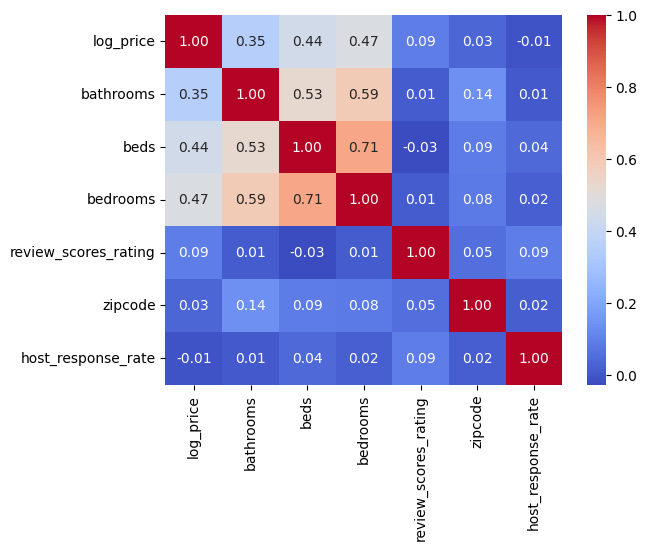

In [ ]:
col=["log_price","bathrooms","beds","bedrooms","review_scores_rating","zipcode","host_response_rate"]
df=stays[col]
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [9]:
stays.drop(columns=["thumbnail_url"],inplace=True)
stays.dropna(subset=["bedrooms","beds","bathrooms"], inplace=True)
stays.dropna(subset=["host_since","first_review"],how="all",inplace=True)
stays

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,18-07-2016,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,23-09-2017,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,14-09-2017,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,22-01-2017,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,NaN,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,11206,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,15-04-2017,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,10-09-2017,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,11206,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,NaN,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,10011,0.0,2.0


In [10]:
stays["host_since"].fillna(stays["first_review"],inplace=True)
stays["first_review"].fillna(stays["host_since"],inplace=True)

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


Task 4: here I have tried to get sentiment analysis by different method like BERT but due to large dataset it was taking too much time and resources, so I used `TextBlob` for sentiment analysis in the end.

* In this all the rows are analaysed sequentially and are given scores or polarity and if that comes to be positive it is given `1` value, `0` if neutral, otherwise `-1`

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return 1
    elif sentiment_score <= -0.05:
        return 0
    else:
        return -1

# Apply sentiment analysis to description column
stays['sentiment'] = stays['description'].apply(analyze_sentiment)

In [11]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 1
    elif polarity == 0:
        return 0
    else:
        return -1

stays['sentiment'] = stays['description'].apply(analyze_sentiment)
stays["sentiment"]

0        1
1        1
2        1
3        1
4        1
        ..
74106    1
74107    1
74108    1
74109    1
74110    1
Name: sentiment, Length: 72684, dtype: int64

In [12]:
stays["sentiment"].value_counts()

sentiment
 1    70814
 0     1221
-1      649
Name: count, dtype: int64

Task 5: different kinds of ammentites are first scored in a list, then sequentially went through each row to see if a particular ammenity is given in that hotel or row.

In [14]:
unique_amenities = set()
for amns in stays['amenities']:
    unique_amenities.update(amns.split(', '))

# Create binary features for each amenity
for amenity in unique_amenities:
    stays[amenity] = stays['amenities'].apply(lambda x: 1 if amenity in x else 0)


correlation_matrix = stays.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['log_price']].sort_values(by='log_price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Amenities with Price')
plt.xlabel('Amenity')
plt.ylabel('Price')
plt.show()

Streaming output truncated to the last 5000 lines.
<ipython-input-14-32aceca89f75>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stays[amenity] = stays['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-14-32aceca89f75>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stays[amenity] = stays['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-14-32aceca89f75>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has po

KeyboardInterrupt: 

> *EDA*

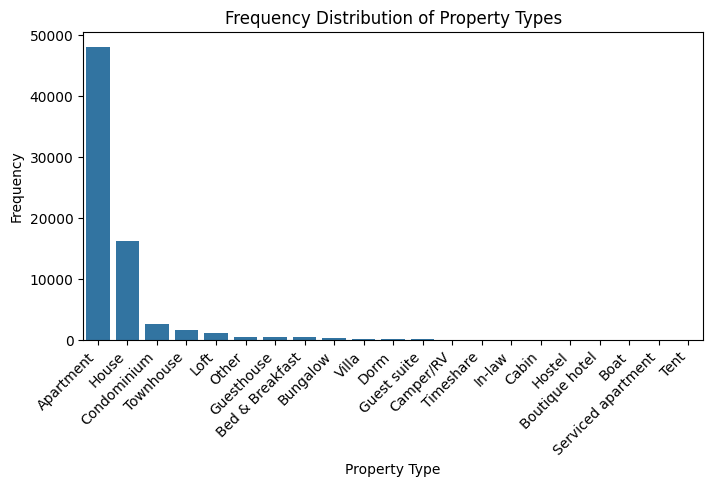

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x='property_type', data=stays, order=stays['property_type'].value_counts().index)
plt.title('Frequency Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Boxplot gives 5 values in 1 graph: maximum and minimum values, 3 quarters. this shows that apartement have high price value.


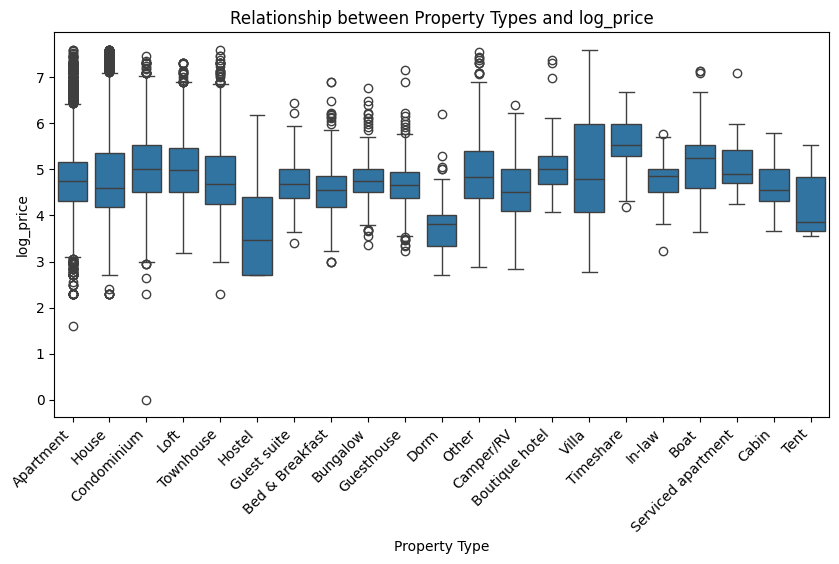

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='property_type', y='log_price', data=stays)
plt.title('Relationship between Property Types and log_price')
plt.xlabel('Property Type')
plt.ylabel('log_price')
plt.xticks(rotation=45, ha='right')
plt.show()

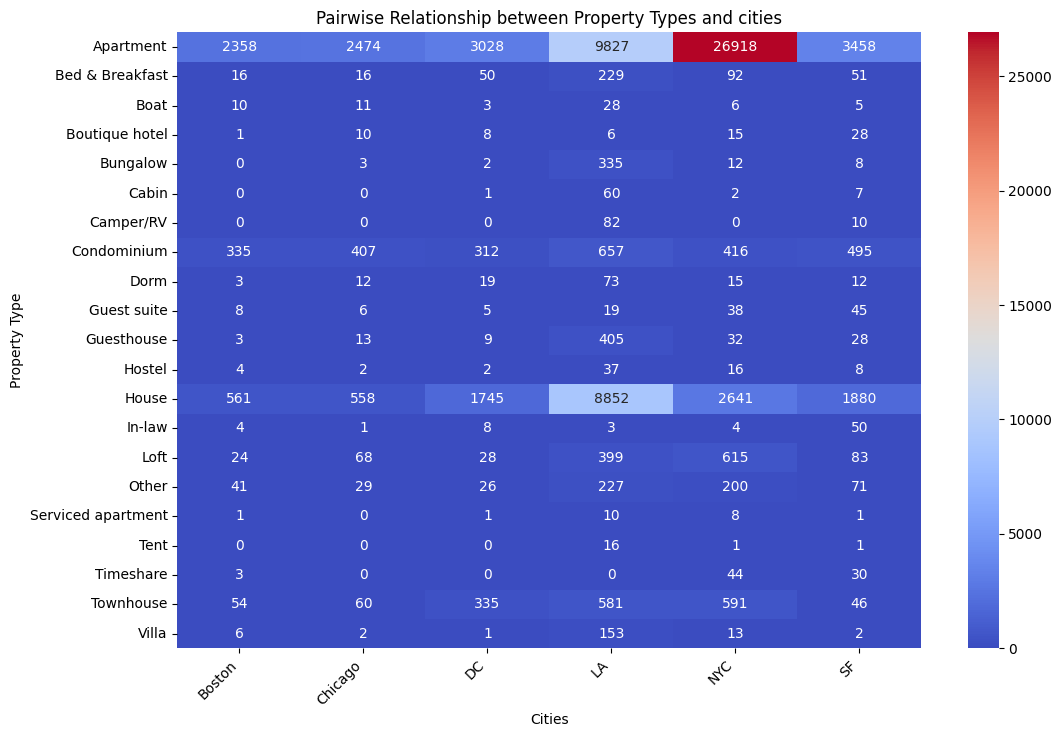

In [28]:
cross_tab = pd.crosstab(stays['property_type'], stays['city'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap='coolwarm', annot=True, fmt='d')
plt.title('Pairwise Relationship between Property Types and cities')
plt.xlabel('Cities')
plt.ylabel('Property Type')
plt.xticks(rotation=45, ha='right')
plt.show()

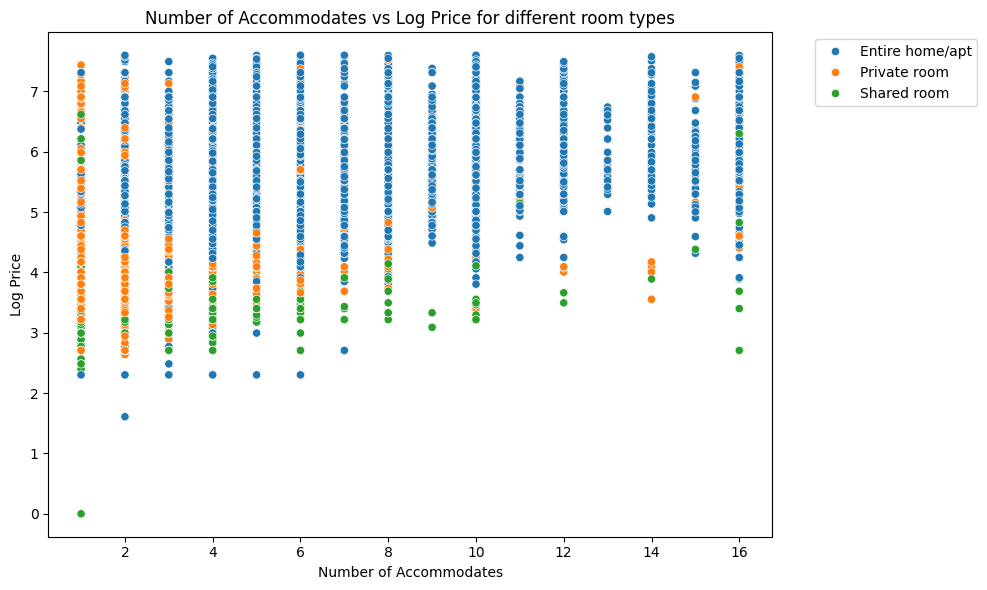

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='accommodates', y='log_price', hue='room_type', data=stays)
plt.xlabel('Number of Accommodates')
plt.ylabel('Log Price')
plt.title('Number of Accommodates vs Log Price for different room types')
# plt.legend(*show.legend_elements(),title="Target");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

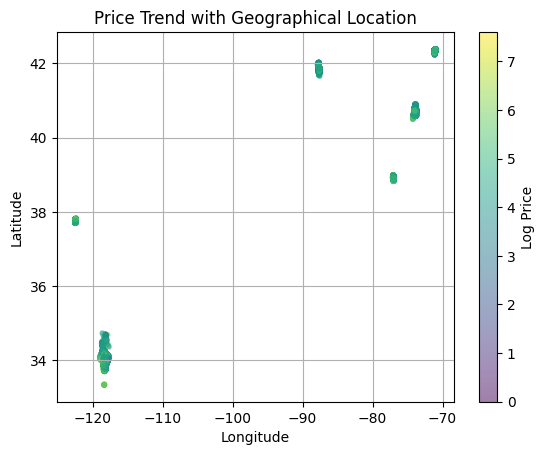

In [31]:
plt.scatter(stays['longitude'], stays['latitude'], c=stays['log_price'], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(label='Log Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Trend with Geographical Location')

plt.grid(True)
plt.show()

In [97]:
# to impute other columns I am splitting the dataset so that while using fit_transform it doesn't leak data.
x = stays.drop("log_price", axis=1)
y = stays["log_price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=43)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
x_train

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,sentiment
0,12873061,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,...,34.078242,-118.252070,Echo Park Angels View,Echo Park,101,98.0,90026,0.0,1.0,1
1,19737484,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,False,NYC,...,40.856945,-73.934858,Perfect getaway in NYC!,Washington Heights,12,95.0,10040,1.0,2.0,1
2,4519011,House,Entire home/apt,"{Kitchen,Breakfast,Heating,""Smoke detector"",""C...",3,1.0,Real Bed,flexible,False,DC,...,38.916581,-77.036337,"1 bed w/ large living space, walk to White House!",U Street Corridor,0,NaN,20009,1.0,1.0,1
3,66251,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,NYC,...,40.693603,-73.948640,Spacious Oasis w/ Private Entrance,Bedford-Stuyvesant,24,97.0,11206,1.0,3.0,1
4,8206060,Apartment,Private room,"{""Wireless Internet"",Kitchen,Elevator,Heating,...",2,1.0,Real Bed,strict,True,NYC,...,40.815303,-73.950801,Perfect bedroom. Near Subways Columbia CityCol...,Harlem,8,94.0,10027,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58142,405622,House,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",4,2.0,Real Bed,moderate,True,SF,...,37.762612,-122.491456,2 brand new downstairs bedrooms,Outer Sunset,28,97.0,94122,2.0,2.0,1
58143,10138533,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.5,Real Bed,strict,True,NYC,...,40.690428,-73.956771,Sunny 2 Bedroom Duplex with Garden,Bedford-Stuyvesant,11,93.0,11205,2.0,4.0,1
58144,2022728,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,LA,...,34.107495,-118.261152,Spacious 1 BR Apt - 30 day minimum stay,Silver Lake,76,98.0,90039,1.0,1.0,1
58145,3218873,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,False,Chicago,...,41.985734,-87.767294,Jefferson Pk Woods & bike path & 15 mins to O'...,Jefferson Park,0,NaN,60646,0.0,2.0,1


In [98]:
transformed_columns=["neighbourhood","last_review","review_scores_rating","host_response_rate","host_has_profile_pic","host_identity_verified"]

In [99]:
x_train.isna().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review                  0
host_has_profile_pic        114
host_identity_verified      114
host_response_rate        14317
host_since                    0
instant_bookable              0
last_review               12339
latitude                      0
longitude                     0
name                          0
neighbourhood              5147
number_of_reviews             0
review_scores_rating      13041
zipcode                       0
bedrooms                      0
beds                          0
sentiment                     0
dtype: int64

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

np.random.seed(43)
#  defining some imputers i.e. which fills some value
const_imputer = SimpleImputer(strategy="constant", fill_value="Missing")
# here streategy is constant so fill them with the constant value provided
defined_imputer = SimpleImputer(strategy="constant", fill_value="04-05-2024")
num_imputer = SimpleImputer(strategy="mean")
# here fill the numerical value which is mean
num_imputer2 = SimpleImputer(strategy="most_frequent")

# define columns
const_features = ["neighbourhood"]
defined_features = ["last_review"]
num_features = ["review_scores_rating","host_response_rate"]
num_features2=["host_has_profile_pic","host_identity_verified"]

# creating a transformer or imputer which will transfrom the columns according to the imputers defined
imputer = ColumnTransformer([("const_imputer", const_imputer, const_features),
                            ("defined_imputer", defined_imputer, defined_features),
                            ("num_imputer", num_imputer, num_features),
                            ("num_imputer2", num_imputer2, num_features2)])
# column transformer takes list and tuples in it, list--> different imputers,tuples--> different entities of a particular imputer i.e. first name u want to give, imputer, features which we want to change using the imputer

# fill train and test data seperately
filled_x_train = imputer.fit_transform(x_train[transformed_columns])
# fits and imputes the missing values
filled_x_test = imputer.transform(x_test[transformed_columns])
# imputes the missing value
filled_x_train


array([['Echo Park', '14-04-2017', 98.0, 100.0, 't', 't'],
       ['Washington Heights', '01-01-2017', 95.0, 94.39107916951859, 't',
        't'],
       ['U Street Corridor', '04-05-2024', 94.05367356892653,
        94.39107916951859, 't', 't'],
       ...,
       ['Silver Lake', '27-03-2017', 98.0, 100.0, 't', 't'],
       ['Jefferson Park', '04-05-2024', 94.05367356892653, 100.0, 't',
        't'],
       ['Upper West Side', '04-05-2024', 94.05367356892653,
        94.39107916951859, 't', 'f']], dtype=object)

In [101]:
# transformed_columns=["neighbourhood","last_review","review_scores_rating","host_response_rate","host_has_profile_pic","host_identity_verified"]
transformed_df = pd.DataFrame(filled_x_train, columns=transformed_columns)
transformed_df

,neighbourhood,last_review,review_scores_rating,host_response_rate,host_has_profile_pic,host_identity_verified
0,Echo Park,14-04-2017,98.0,100.0,t,t
1,Washington Heights,01-01-2017,95.0,94.391079,t,t
2,U Street Corridor,04-05-2024,94.053674,94.391079,t,t
3,Bedford-Stuyvesant,08-01-2017,97.0,94.391079,t,t
4,Harlem,24-09-2017,94.0,90.0,t,t
...,...,...,...,...,...,...
58142,Outer Sunset,29-07-2017,97.0,100.0,t,t
58143,Bedford-Stuyvesant,18-09-2017,93.0,100.0,t,t
58144,Silver Lake,27-03-2017,98.0,100.0,t,t
58145,Jefferson Park,04-05-2024,94.053674,100.0,t,t


In [102]:
x_train[transformed_columns]=transformed_df
x_train[transformed_columns]

,neighbourhood,last_review,review_scores_rating,host_response_rate,host_has_profile_pic,host_identity_verified
0,Echo Park,14-04-2017,98.0,100.0,t,t
1,Washington Heights,01-01-2017,95.0,94.391079,t,t
2,U Street Corridor,04-05-2024,94.053674,94.391079,t,t
3,Bedford-Stuyvesant,08-01-2017,97.0,94.391079,t,t
4,Harlem,24-09-2017,94.0,90.0,t,t
...,...,...,...,...,...,...
58142,Outer Sunset,29-07-2017,97.0,100.0,t,t
58143,Bedford-Stuyvesant,18-09-2017,93.0,100.0,t,t
58144,Silver Lake,27-03-2017,98.0,100.0,t,t
58145,Jefferson Park,04-05-2024,94.053674,100.0,t,t


In [103]:
x_train.isna().sum()

id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
sentiment                 0
dtype: int64

In [104]:
transformed_test = pd.DataFrame(filled_x_test, columns=transformed_columns)
x_test[transformed_columns]=transformed_test

Task 1: Feature engineering
first I have converted columns to datetime format to create columns host tenure and days since last review and also converted them into numeric values to train the data

In [105]:
x_train['host_since'] = pd.to_datetime(x_train['host_since'],dayfirst=True)
x_train['last_review'] = pd.to_datetime(x_train['last_review'],dayfirst=True)
x_test['host_since'] = pd.to_datetime(x_test['host_since'],dayfirst=True)
x_test['last_review'] = pd.to_datetime(x_test['last_review'],dayfirst=True)


In [106]:
x_train["Host_Tenure"]=(pd.to_datetime("2024-05-04")-x_train["host_since"]).dt.days
x_test["Host_Tenure"]=(pd.to_datetime("2024-05-04")-x_test["host_since"]).dt.days

x_train["Days_Since_Last_Review"]=(pd.to_datetime("2024-05-04")-x_train["last_review"]).dt.days
x_test["Days_Since_Last_Review"]=(pd.to_datetime("2024-05-04")-x_test["last_review"]).dt.days
x_train

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,name,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,sentiment,Host_Tenure,Days_Since_Last_Review
0,12873061,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,...,Echo Park Angels View,Echo Park,101,98.0,90026,0.0,1.0,1,4812,2577
1,19737484,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,strict,False,NYC,...,Perfect getaway in NYC!,Washington Heights,12,95.0,10040,1.0,2.0,1,3695,2680
2,4519011,House,Entire home/apt,"{Kitchen,Breakfast,Heating,""Smoke detector"",""C...",3,1.0,Real Bed,flexible,False,DC,...,"1 bed w/ large living space, walk to White House!",U Street Corridor,0,94.053674,20009,1.0,1.0,1,3194,0
3,66251,Apartment,Private room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,NYC,...,Spacious Oasis w/ Private Entrance,Bedford-Stuyvesant,24,97.0,11206,1.0,3.0,1,3776,2673
4,8206060,Apartment,Private room,"{""Wireless Internet"",Kitchen,Elevator,Heating,...",2,1.0,Real Bed,strict,True,NYC,...,Perfect bedroom. Near Subways Columbia CityCol...,Harlem,8,94.0,10027,1.0,1.0,1,3614,2414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58142,405622,House,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",4,2.0,Real Bed,moderate,True,SF,...,2 brand new downstairs bedrooms,Outer Sunset,28,97.0,94122,2.0,2.0,1,3029,2471
58143,10138533,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",6,1.5,Real Bed,strict,True,NYC,...,Sunny 2 Bedroom Duplex with Garden,Bedford-Stuyvesant,11,93.0,11205,2.0,4.0,1,4844,2420
58144,2022728,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,LA,...,Spacious 1 BR Apt - 30 day minimum stay,Silver Lake,76,98.0,90039,1.0,1.0,1,4495,2595
58145,3218873,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,False,Chicago,...,Jefferson Pk Woods & bike path & 15 mins to O'...,Jefferson Park,0,94.053674,60646,0.0,2.0,1,2961,0


In [108]:
x_train['Amenities_Count'] = x_train['amenities'].str.count(',') + 1
x_train["Amenities_Count"]

0        21
1        17
2         9
3        22
4        12
         ..
58142    28
58143    40
58144    25
58145    21
58146    17
Name: Amenities_Count, Length: 58147, dtype: int64

In [109]:
x_test['Amenities_Count'] = x_test['amenities'].str.count(',') + 1

In [110]:
x_train.drop(columns=["amenities","description","neighbourhood","name","host_since","last_review","first_review"],inplace=True)
x_test.drop(columns=["amenities","description","neighbourhood","name","host_since","last_review","first_review"],inplace=True)

<Axes: >

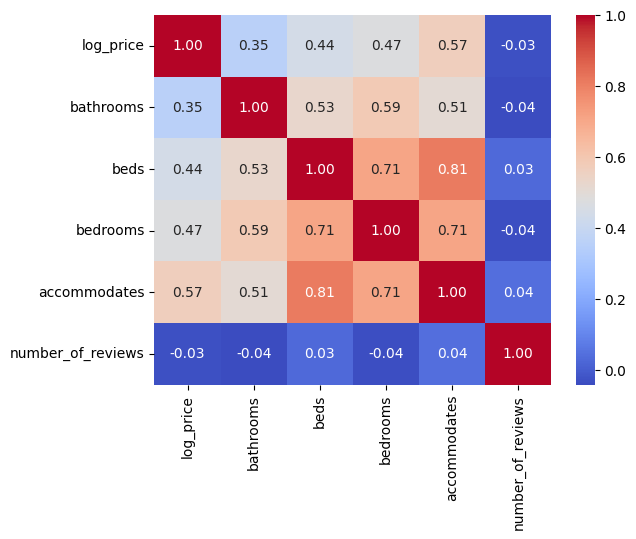

In [111]:
col2=["log_price","bathrooms","beds","bedrooms","accommodates","number_of_reviews"]
df=stays[col2]
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

* **one hot encode**-> room_type, property_type, bed_type, city

* **ordinal encode**-> instant_bookable, cleaning_fee, host_has_profile_pic, host_identity_verified, cancellation policy

In [112]:
category_features = ["room_type","property_type","bed_type","city"]
ordinal_features=["instant_bookable","cleaning_fee","host_has_profile_pic","host_identity_verified","cancellation_policy"]
one_hot = OneHotEncoder()
ordinal=OrdinalEncoder()

transformer = ColumnTransformer(
    [("one_hot", one_hot, category_features),
     ("ordinal", ordinal, ordinal_features)], remainder="passthrough")

transform_train = transformer.fit_transform(x_train)
transform_test=transformer.transform(x_test)
transform_train

array([[1.0, 0.0, 0.0, ..., 4812, 2577, 21],
       [1.0, 0.0, 0.0, ..., 3695, 2680, 17],
       [1.0, 0.0, 0.0, ..., 3194, 0, 9],
       ...,
       [1.0, 0.0, 0.0, ..., 4495, 2595, 25],
       [0.0, 1.0, 0.0, ..., 2961, 0, 21],
       [0.0, 1.0, 0.0, ..., 2932, 0, 17]], dtype=object)

In [113]:
transform_train[0]

array([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0,
       1.0, 12873061, 2, 1.0, 100.0, 34.07824184, -118.2520696, 101, 98.0,
       90026, 0.0, 1.0, 1, 4812, 2577, 21], dtype=object)

In [114]:
train_transformed=pd.DataFrame(transform_train)
train_transformed

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-118.25207,101,98.0,90026,0.0,1.0,1,4812,2577,21
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.934858,12,95.0,10040,1.0,2.0,1,3695,2680,17
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-77.036337,0,94.053674,20009,1.0,1.0,1,3194,0,9
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.94864,24,97.0,11206,1.0,3.0,1,3776,2673,22
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.950801,8,94.0,10027,1.0,1.0,1,3614,2414,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-122.491456,28,97.0,94122,2.0,2.0,1,3029,2471,28
58143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.956771,11,93.0,11205,2.0,4.0,1,4844,2420,40
58144,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-118.261152,76,98.0,90039,1.0,1.0,1,4495,2595,25
58145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-87.767294,0,94.053674,60646,0.0,2.0,1,2961,0,21


In [115]:
test_transformed=pd.DataFrame(transform_test)

Task 7: Model Training

In [116]:
from sklearn.linear_model import LinearRegression

np.random.seed(43)
model = LinearRegression()
model.fit(train_transformed, y_train)
model.score(test_transformed, y_test)

0.5910401565484309

In [118]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(43)
models={
    "Random":RandomForestRegressor(),
    "Ridge":Ridge(),
    "Gradient": GradientBoostingRegressor()
}
score={}
for model_name,model in models.items():
    model.fit(train_transformed, y_train)
    score[model_name]=model.score(test_transformed, y_test)*100
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.139e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'Random': 70.18263489085011,
 'Ridge': 58.7031265579258,
 'Gradient': 67.28511585086915}

<Axes: >

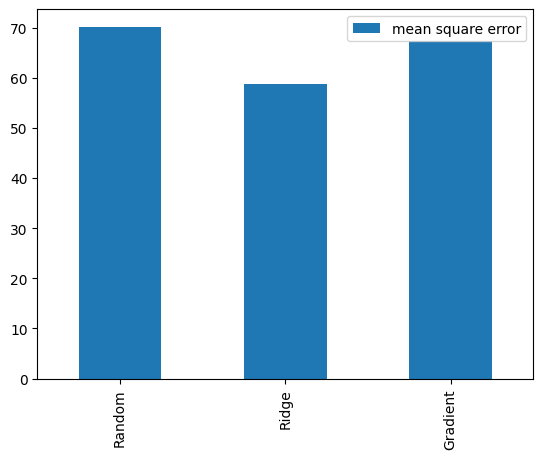

In [119]:
compare=pd.DataFrame(score,index=["mean square error"])
compare.T.plot.bar()

In [ ]:
np.random.seed(43)
from sklearn.model_selection import GridSearchCV
grid = {
        "n_estimators": [100, 200, 500],
        "max_depth": [None,10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
}
random=RandomForestRegressor()
random_model=GridSearchCV(random,grid,cv=5,verbose=1,n_jobs=-1)
random_model.fit(train_transformed, y_train)


I had to stop the training because it took too much time because of lot of parameters after encoding the data, I could have reduced property type and bed type data if time permitted.

In [ ]:

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

def scores(model):
    y_preds = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_preds)
    mse = root_mean_squared_error(y_test, y_preds)
    r2_score=r2_score(y_test, y_preds)

In [ ]:
print(f"Random Forest Regressor: {scores(random_model)}")
# print(f"HistGradient Boosting Regressor: {scores(gradient_model)}")

In [ ]:
import pickle
pickle.dump(random_model,open("model.pkl","wb"))